>**Luca Pedretti** (0000853719) - Data Science in Manufacturing

# 1- Setup

In [79]:
import os
import numpy as np
import matplotlib.pyplot as plt
path_to_DS2 = r'C:\Users\Luca\OneDrive\Documenti\University\Master in Data Science\Data Science in Manufacturing\DS2'

Import the remaining modules

Create a list with the path to each file of the first dataset (DS2)

In [80]:
DS2 = [os.path.join(path_to_DS2, f) for f in os.listdir(path_to_DS2)]
DS2.sort()

In [81]:
DS2 = DS2[7:14]

In [82]:
DS2

['C:\\Users\\Luca\\OneDrive\\Documenti\\University\\Master in Data Science\\Data Science in Manufacturing\\DS2\\20130111092838continuo.dat',
 'C:\\Users\\Luca\\OneDrive\\Documenti\\University\\Master in Data Science\\Data Science in Manufacturing\\DS2\\20130111093220continuo.dat',
 'C:\\Users\\Luca\\OneDrive\\Documenti\\University\\Master in Data Science\\Data Science in Manufacturing\\DS2\\20130111094402continuo.dat',
 'C:\\Users\\Luca\\OneDrive\\Documenti\\University\\Master in Data Science\\Data Science in Manufacturing\\DS2\\20130111095117continuo.dat',
 'C:\\Users\\Luca\\OneDrive\\Documenti\\University\\Master in Data Science\\Data Science in Manufacturing\\DS2\\20130111095449continuo.dat']

# 2- Read the DS2 file corresponding to "AIR IN" 

In [83]:
import read_bin as rb

file_struct = rb.ptr_record(DS2[4])

data = []

for record in file_struct[:, 0]:
    data.append(rb.read_record(DS2[4], record))

Describe the structure of data

In [84]:
print(len(data))

print(len(data[0]))

# Timestamp
print(data[0][0])

# Raw signals: P1_x, P1_y, P1_z, P2_x, P2_y, P2_z.
print(data[0][1])

227
2
2013-01-11 09:54:50.781000
[[-3.56145573 -3.86816216 -2.78477144  1.08796823  0.93690395  1.99130237]
 [-3.714046   -2.42160678 -2.91905093 -0.09765774  1.857023   -1.37788963]
 [-3.77203012 -1.42519259 -2.28274965 -0.58289462  0.58899826  0.16784924]
 ..., 
 [-2.04318309  1.32448316  0.12512398  0.61493856  3.41039133 -3.43327999]
 [-1.46181428  2.21408415 -0.04272526  2.06607151  0.93690395  0.60425729]
 [-1.27870607  1.93942165  0.01678493  1.87228203 -2.56961918  0.47913328]]


# 3- Plot the data 

In [85]:
# Init data array
n_points = 75000
n_records = len(data)

signals = np.zeros((n_points * n_records, 6), float)

# Store data as a single array
i = 0
for item in data:
    signals[i:(i + n_points), :] = item[1]
    i += n_points

## 3.1- P1_x

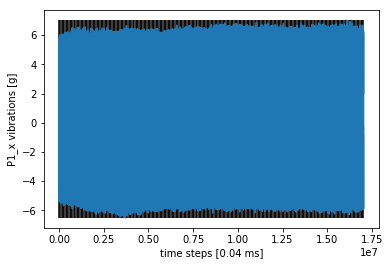

In [86]:
P1_x = signals[:, 0]

# Place a vertical line corresponding to the end of each data record
vline_coord = np.arange(0, n_points * (n_records + 1), n_points)

plt.plot(P1_x)
plt.vlines(vline_coord, ymin=P1_x.min(), ymax=P1_x.max())
plt.ylabel('P1_x vibrations [g]')
plt.xlabel('time steps [0.04 ms]')
plt.show()

## 3.2- P1_y

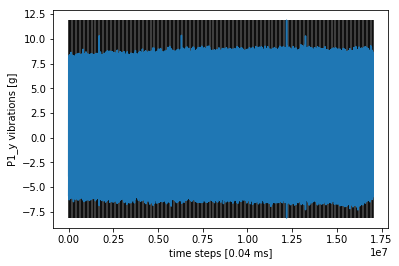

In [87]:
P1_y = signals[:, 1]

# Place a vertical line corresponding to the end of each data record
vline_coord = np.arange(0, n_points * (n_records + 1), n_points)

plt.plot(P1_y)
plt.vlines(vline_coord, ymin=P1_y.min(), ymax=P1_y.max())
plt.ylabel('P1_y vibrations [g]')
plt.xlabel('time steps [0.04 ms]')
plt.show()

## 3.3- P1_z

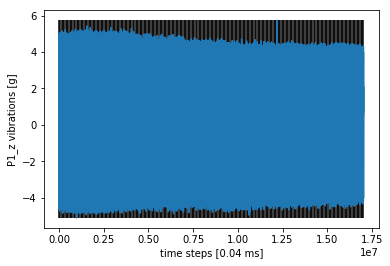

In [88]:
P1_z = signals[:, 2]

# Place a vertical line corresponding to the end of each data record
vline_coord = np.arange(0, n_points * (n_records + 1), n_points)

plt.plot(P1_z)
plt.vlines(vline_coord, ymin=P1_z.min(), ymax=P1_z.max())
plt.ylabel('P1_z vibrations [g]')
plt.xlabel('time steps [0.04 ms]')
plt.show()

## 3.4- P2_x

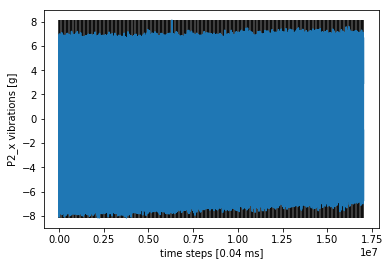

In [89]:
P2_x = signals[:, 3]

# Place a vertical line corresponding to the end of each data record
vline_coord = np.arange(0, n_points * (n_records + 1), n_points)

plt.plot(P2_x)
plt.vlines(vline_coord, ymin=P2_x.min(), ymax=P2_x.max())
plt.ylabel('P2_x vibrations [g]')
plt.xlabel('time steps [0.04 ms]')
plt.show()

## 3.5- P2_y

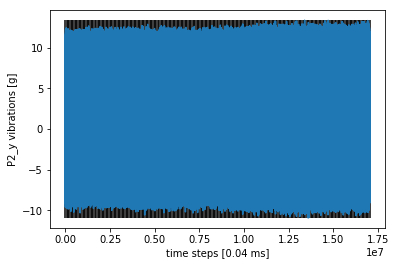

In [90]:
P2_y = signals[:, 4]

# Place a vertical line corresponding to the end of each data record
vline_coord = np.arange(0, n_points * (n_records + 1), n_points)

plt.plot(P2_y)
plt.vlines(vline_coord, ymin=P2_y.min(), ymax=P2_y.max())
plt.ylabel('P2_y vibrations [g]')
plt.xlabel('time steps [0.04 ms]')
plt.show()

## 3.6- P2_z

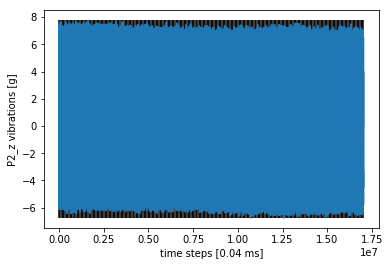

In [91]:
P2_z = signals[:, 5]

# Place a vertical line corresponding to the end of each data record
vline_coord = np.arange(0, n_points * (n_records + 1), n_points)

plt.plot(P2_z)
plt.vlines(vline_coord, ymin=P2_z.min(), ymax=P2_z.max())
plt.ylabel('P2_z vibrations [g]')
plt.xlabel('time steps [0.04 ms]')
plt.show()

# 4- Compute some basic stats for one record

In [92]:
signals = data[0][1]

np.max(signals, axis=0)

array([  6.00747681,   8.3543148 ,   5.05226231,   6.98252821,
        12.43457699,   7.63408852], dtype=float32)

In [93]:
from scipy import stats

signals = data[0][1]

stats.describe(signals)

DescribeResult(nobs=75000, minmax=(array([-5.40932322, -6.29892445, -4.73945236, -8.09185886, -9.74746323,
       -6.11276436], dtype=float32), array([  6.00747681,   8.3543148 ,   5.05226231,   6.98252821,
        12.43457699,   7.63408852], dtype=float32)), mean=array([-0.04457983, -0.04446109, -0.02900453,  0.01703296,  0.00012376,
       -0.00468865], dtype=float32), variance=array([ 4.6848278 ,  4.79097795,  2.66068101,  4.40289831,  7.42498732,
        2.41213417], dtype=float32), skewness=array([ 0.1151492 ,  0.36028123, -0.1160444 ,  0.19565514,  0.40821871,
        0.09124278], dtype=float32), kurtosis=array([-0.70932126,  0.30573773, -0.43838573,  0.14627767,  0.63785386,
        0.89210224], dtype=float32))

where the DescribeResult has the following structure:
<pre><code>
00. NOBS     : INT
01. MINMAX   : TUPLE(ARRAY(MIN), ARRAY(MAX))
02. MEAN     : ARRAY
03. VARIANCE : ARRAY
04. SKEWNESS : ARRAY
05. KURTOSIS : ARRAY
where ARRAY contains 6 elements, corresponding to:
P1_x, P1_y, P1_z, P2_x, P2_y, P2_z
</code></pre>

# 5- Read and perform features extraction on all the DS2 data

In [94]:
ds2_stats = []

for File in DS2:
    record_stats = []
    file_struct = rb.ptr_record(File)
    for record in file_struct[:, 0]:
        data = rb.read_record(File, record)
        timestamp = data[0]
        statistics = stats.describe(data[1])
        record_stats.append([timestamp, statistics])

    ds2_stats.append(record_stats)

# 6- Plot the DS2 stats

In [95]:
DS2_stats = []

for File in ds2_stats:
    DS2_stats_per_file = []
    for record in File:
        DS2_stats_per_file.append(record[1])
    DS2_stats.append(DS2_stats_per_file)

In [96]:
DS2_vline_coord = np.asarray([len(item) for item in DS2_stats])
i = 1
while i < len(DS2_vline_coord):
    DS2_vline_coord[i] += DS2_vline_coord[i - 1]
    i += 1


## 6.1- Variance

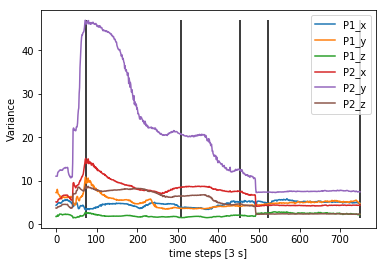

In [97]:
var = []
for item in DS2_stats:
    for stat in item:
        var.append(stat[3])
var = np.asarray(var)

plt.plot(var[:,0], label='P1_x')
plt.plot(var[:,1], label='P1_y')
plt.plot(var[:,2], label='P1_z')
plt.plot(var[:,3], label='P2_x')
plt.plot(var[:,4], label='P2_y')
plt.plot(var[:,5], label='P2_z')
plt.legend()
plt.vlines(DS2_vline_coord, ymin=var.min(), ymax=var.max())
plt.ylabel('Variance')
plt.xlabel('time steps [3 s]')
plt.show()

>We can clearly see that the variance of **P2_y** is the most **insightful**

## 6.2- Skewness

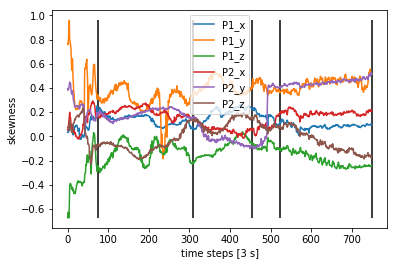

In [98]:
skew = []
for item in DS2_stats:
    for stat in item:
        skew.append(stat[4])


skew = np.asarray(skew)

plt.plot(skew[:,0], label='P1_x')
plt.plot(skew[:,1], label='P1_y')
plt.plot(skew[:,2], label='P1_z')
plt.plot(skew[:,3], label='P2_x')
plt.plot(skew[:,4], label='P2_y')
plt.plot(skew[:,5], label='P2_z')
plt.legend()
plt.vlines(DS2_vline_coord, ymin=skew.min(), ymax=skew.max())
plt.ylabel('skewness')
plt.xlabel('time steps [3 s]')
plt.show()

## 6.3- Kurtosis

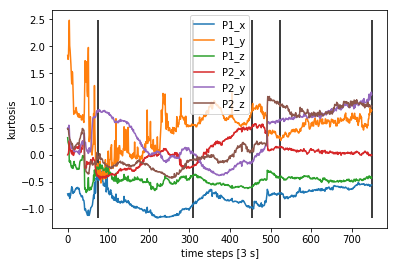

In [99]:
kurt = []
for item in DS2_stats:
    for stat in item:
        kurt.append(stat[5])


kurt = np.asarray(kurt)

plt.plot(kurt[:,0], label='P1_x')
plt.plot(kurt[:,1], label='P1_y')
plt.plot(kurt[:,2], label='P1_z')
plt.plot(kurt[:,3], label='P2_x')
plt.plot(kurt[:,4], label='P2_y')
plt.plot(kurt[:,5], label='P2_z')
plt.legend()
plt.vlines(DS2_vline_coord, ymin=kurt.min(), ymax=kurt.max())
plt.ylabel('kurtosis')
plt.xlabel('time steps [3 s]')
plt.show()

## 6.4- Mean

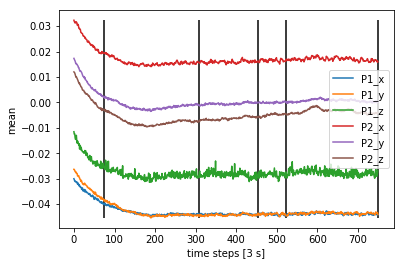

In [100]:
mean = []
for item in DS2_stats:
    for stat in item:
        mean.append(stat[2])


mean = np.asarray(mean)

plt.plot(mean[:,0], label='P1_x')
plt.plot(mean[:,1], label='P1_y')
plt.plot(mean[:,2], label='P1_z')
plt.plot(mean[:,3], label='P2_x')
plt.plot(mean[:,4], label='P2_y')
plt.plot(mean[:,5], label='P2_z')
plt.legend()
plt.vlines(DS2_vline_coord, ymin=mean.min(), ymax=mean.max())
plt.ylabel('mean')
plt.xlabel('time steps [3 s]')
plt.show()

# 7- Build a classifier 

## 7.1- Re-arranging data

In [101]:
Min, Max, Mean, Var, Skew, Kurtosis = [], [], [], [], [], []
for item in DS2_stats:
    for stat in item:
        Min.append(stat[1][0])
        Max.append(stat[1][1])
        Mean.append(stat[2])
        Var.append(stat[3])
        Skew.append(stat[4])
        Kurtosis.append(stat[5])

data = [Min, Max, Mean, Var, Skew, Kurtosis]
data = [np.asarray(stat) for stat in data]
DS2 = np.concatenate(data, axis=1)
print(DS2.shape)

(750, 36)


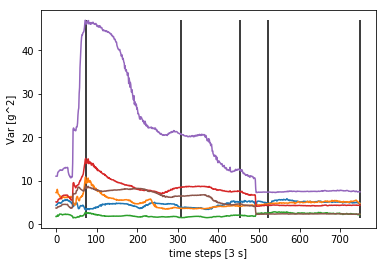

In [102]:
Var = DS2[:,18:24]
plt.plot(Var)
plt.vlines(DS2_vline_coord, ymin=Var.min(), ymax=Var.max())
plt.ylabel('Var [g^2]')
plt.xlabel('time steps [3 s]')
plt.show()

## 7.2- Assigning class labels with Clustering

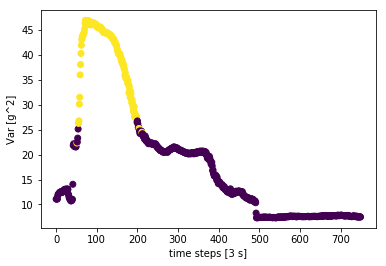

In [103]:
from sklearn.cluster import KMeans
import mystandardize as stand
r_state=10
km = KMeans(n_clusters=2,random_state=r_state).fit(stand.rescale(DS2))
DS2cluster=km.labels_
Var = DS2[:,22]
plt.scatter(np.arange(len(Var)),Var,c=DS2cluster)
plt.ylabel('Var [g^2]')
plt.xlabel('time steps [3 s]')
plt.show()

>We are interested in predicting the yellow cluster (where we can find **cavitation problems**) in order to build an alarm 

In [104]:
print("Clustering signals accordind to their stats produce a {0:.2f}% of possible alarms to be predicted by our classi".format((sum(DS2cluster==1)/len(DS2cluster))*100))

Clustering signals accordind to their stats produce a 19.60% of possible alarms to be predicted by our classi


## 7.3- Train a simple Decision Tree

In [105]:
from sklearn import tree
from sklearn.model_selection import train_test_split

y= DS2cluster
X=stand.rescale(DS2)
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=r_state)

clf=tree.DecisionTreeClassifier(criterion='entropy',random_state=r_state)

clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

## 7.4- Test it on the training and test set

In [106]:
import measure_performance as mp
mp.measure_performance(X_train,y_train,clf)

Accuracy:1.000 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       451
          1       1.00      1.00      1.00       111

avg / total       1.00      1.00      1.00       562
 

Confusion matrix
[[451   0]
 [  0 111]] 



In [107]:
mp.measure_performance(X_test,y_test,clf)

Accuracy:0.995 

Classification report
             precision    recall  f1-score   support

          0       0.99      1.00      1.00       152
          1       1.00      0.97      0.99        36

avg / total       0.99      0.99      0.99       188
 

Confusion matrix
[[152   0]
 [  1  35]] 



## 7.5- Interpret the decision tree

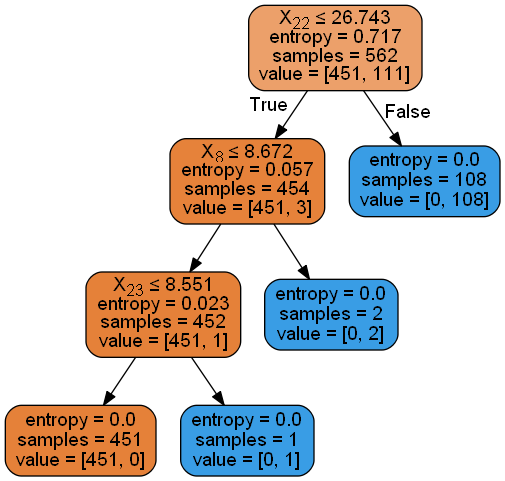

In [108]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

>The decision trained on the stats with the lowest level of impurity decrease is **efficient** (99.5% of accuracy on the test set).
From the visualization of the decision tree we can see that the alarm is **triggered** by the classifier if the **variance** (X_22) of P2_y recorded is higher than **26.743**: this means that we could have stopped the tree at the second leaf in order to save time and computational power.

### 7.5.1- A more efficient Decision Tree

Accuracy:0.995 

Classification report
             precision    recall  f1-score   support

          0       0.99      1.00      1.00       152
          1       1.00      0.97      0.99        36

avg / total       0.99      0.99      0.99       188
 

Confusion matrix
[[152   0]
 [  1  35]] 



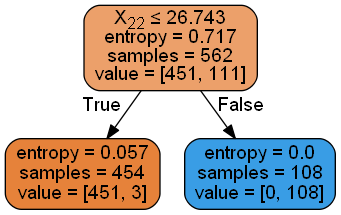

In [109]:
clf=tree.DecisionTreeClassifier(criterion='entropy',random_state=r_state,max_leaf_nodes=2)

clf.fit(X_train,y_train)

mp.measure_performance(X_test,y_test,clf)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 7.6 - Inspect the number of clusters

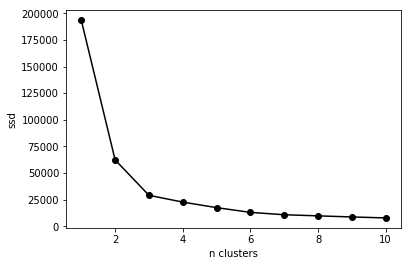

In [110]:
import elbow_plot as ep
ep.elbow_plot(DS2, 10,1)

>From the elbow graph we can see that the optimal number of cluster should be 2 or 3 (at least 4)

### 7.6.1- 3 Cluster Visualization

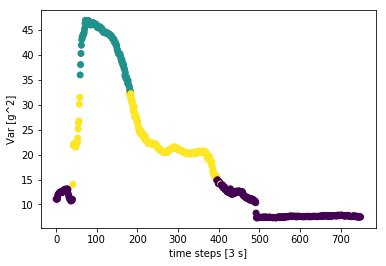

In [111]:
km = KMeans(n_clusters=3,random_state=1).fit(stand.rescale(DS2))
DS2cluster=km.labels_
Var = DS2[:,22]
plt.scatter(np.arange(len(Var)),Var,c=DS2cluster)
plt.ylabel('Var [g^2]')
plt.xlabel('time steps [3 s]')
plt.show()

>From this graph we can see that the **green cluster** is the one that we have to predict to **trigger the alarm**. However also the **yellow cluster** could be really insightful for our analysis, in fact we could identify it as a **'soft' alert** in order to build a **2 level alarm**

### 7.6.2- 4 Cluster Visualization

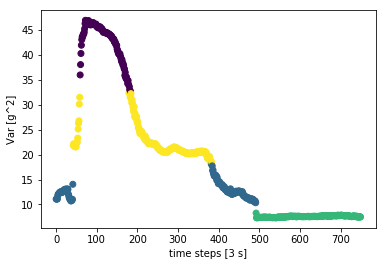

In [112]:
km = KMeans(n_clusters=4,random_state=1).fit(stand.rescale(DS2))
DS2cluster=km.labels_
Var = DS2[:,22]
plt.scatter(np.arange(len(Var)),Var,c=DS2cluster)
plt.ylabel('Var [g^2]')
plt.xlabel('time steps [3 s]')
plt.legend()
plt.show()

>As before we could identify another level of alarm but probably it would be much less insightful than the others.

## 7.7 - Re-train and test the model

In [113]:
km = KMeans(n_clusters=3,random_state=1).fit(stand.rescale(DS2))
DS2cluster=km.labels_

y= DS2cluster

X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=r_state)

clf=tree.DecisionTreeClassifier(criterion='entropy',random_state=r_state)

clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [114]:
import measure_performance as mp
mp.measure_performance(X_train,y_train,clf)

Accuracy:1.000 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       298
          1       1.00      1.00      1.00        98
          2       1.00      1.00      1.00       166

avg / total       1.00      1.00      1.00       562
 

Confusion matrix
[[298   0   0]
 [  0  98   0]
 [  0   0 166]] 



In [115]:
import measure_performance as mp
mp.measure_performance(X_test,y_test,clf)

Accuracy:0.984 

Classification report
             precision    recall  f1-score   support

          0       0.99      1.00      0.99        96
          1       1.00      0.92      0.96        25
          2       0.97      0.99      0.98        67

avg / total       0.98      0.98      0.98       188
 

Confusion matrix
[[96  0  0]
 [ 0 23  2]
 [ 1  0 66]] 



### 7.7.1- Interpret the decision tree

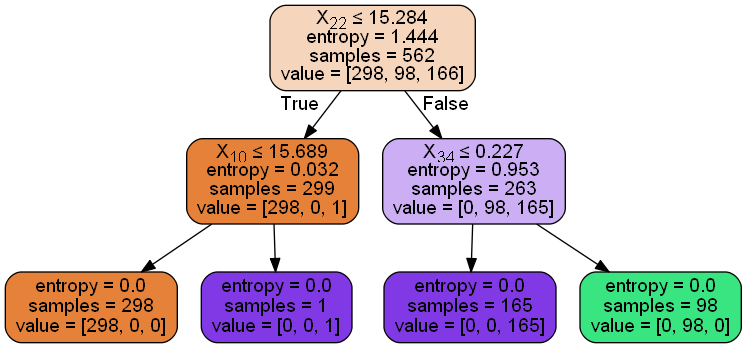

In [117]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

>From the visualization of the decision tree we can see that the **'soft' alarm** is **triggered** by the classifier if the **variance** (X_22) of P2_y recorded is higher than **15.284**, while the **'hard' alarm** is **triggered** if the kurtosis of P2_y (X_34) is higher than 0.227.

# 8 - Conclusions

| Classifier | Training Set Accuracy | Test Set Accuracy |
| ------ | ------ |------|
| Decision Tree Supervised by 2 Clusters | 100% | 99.5% |
| Decision Tree Supervised by 3 Clusters | 100% | 98.4% |

>Both the classifier are reliable but the second one could give us more flexibility due to its two level of alert